# EvaCar

In [79]:
# Import necessary libraries, packages, and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

## 4. Data collection

### 4.1. Initial analysis

In [80]:
# Load data and create dataframe
df = pd.read_csv(f"../datasets/RawDataDB-23-12-10.csv")

In [81]:
# Display a sample of data
df.sample(10)

,manufacturer,model,mileage,year,fuel,price,currency,city,county,status,short_description,long_description
35306,Volkswagen,Touran,285 000 km,2013,Diesel,7 190,EUR,Arad,Arad,Publicat,1.6 TDI DSG Comfortline,"1 598 cm3 • 105 CP • AUTOMAT DSG - an 2013, 1...."
1531,Audi,Q7,21 800 km,2023,Diesel,85 079,EUR,Cluj-Napoca,Cluj,Reactualizat,3.0 50 TDI quattro Tiptronic S Line,2 967 cm3 • 286 CP • Garantie fabrica / Rate /...
26384,Renault,Megane,53 000 km,2018,Benzina,10 900,EUR,Paulesti,Prahova,Publicat,[],1 197 cm3 • 132 CP
28347,Skoda,Octavia,179 480 km,2018,Diesel,12 840,EUR,Bragadiru,Bucuresti,Reactualizat,2.0 TDI (Green tec) DSG Ambition,1 968 cm3 • 150 CP • 2.0 TDI150cp Automata DSG...
24949,Renault,Scenic,129 690 km,2019,Diesel,12 988,EUR,Chiajna,Bucuresti,Reactualizat,BLUE dCi 120 EDC Deluxe-Paket LIMITED,1 750 cm3 • 120 CP • Posibilitate Rate / Avans...
25954,Renault,Megane,215 000 km,2017,Diesel,10 990,EUR,Pitesti,Arges,Publicat,Grandtour ENERGY dCi 110 EDC BOSE EDITION,1 461 cm3 • 110 CP • 05.2017 euro 6/ BOSE / 1....
10371,Dacia,Sandero,136 000 km,2017,Diesel,8 499,EUR,Pitesti,Arges,Publicat,1.5 Blue dCi SL PLUS,1 461 cm3 • 75 CP • Dacia Sandero SL Plus 1.5 ...
29967,Toyota,Land,319 000 km,2011,Diesel,27 900,EUR,Catelu,Bucuresti,Reactualizat,Cruiser V8 4.5 Aut Luxury,4 462 cm3 • 286 CP • Stare perfecta. AUTOUTILI...
3393,Audi,A6,43 800 km,2018,Diesel,39 000,EUR,Iasi,Iasi,Publicat,2.0 40 TDI S tronic Design,1 968 cm3 • 204 CP • Audi A6 40 TDI S Tronic M...
27546,Skoda,Karoq,188 000 km,2019,Diesel,22 999,EUR,Iasi,Iasi,Publicat,2.0 TDI 4X4 DSG Sportline,"1 968 cm3 • 150 CP • Karoq, Sportline, Dsg 4x4..."


In [82]:
# Describe 
df.describe(include="all")

,manufacturer,model,mileage,year,fuel,price,currency,city,county,status,short_description,long_description
count,36534,36534,36456,36534.000000,36534,36534,36534,36534,36532,36534,36400,36534
unique,64,1075,13600,NaN,6,6862,2,687,122,2,9676,30012
top,Mercedes-Benz,Passat,1 km,NaN,Diesel,7 990,EUR,Bucuresti,Bucuresti,Publicat,[],1 968 cm3 • 150 CP
freq,4857,1144,704,NaN,22736,178,36499,8696,12848,20101,9024,216
mean,NaN,NaN,NaN,2016.112909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,5.113379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1966.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36534 entries, 0 to 36533
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   manufacturer       36534 non-null  object
 1   model              36534 non-null  object
 2   mileage            36456 non-null  object
 3   year               36534 non-null  int64 
 4   fuel               36534 non-null  object
 5   price              36534 non-null  object
 6   currency           36534 non-null  object
 7   city               36534 non-null  object
 8   county             36532 non-null  object
 9   status             36534 non-null  object
 10  short_description  36400 non-null  object
 11  long_description   36534 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.3+ MB


### 4.2. Data processing

In [84]:
# Extract data based on specific element
def extract_data(raw_data: str, splitter: str, specific_element: str) -> str:
    """
    Take a raw elements and return specific part of it
    """
    element = 0
    if type(raw_data) == str:
        raw_element = raw_data.split(f"{splitter}")
        for modified_element in raw_element:
            if element == 0:
                if modified_element.endswith(f"{specific_element}"):
                    element = "".join(modified_element.split(" ")[:-1])
    raw_data = element
    
    return raw_data


# Remove spaces
def remove_space(raw_data: str) -> str:
    """
    Take a raw element and return element with removed white spaces
    """
    raw_data = "".join(raw_data.split(" "))
    
    return raw_data

In [85]:
# Add capacity column
capacity = df["long_description"].apply(extract_data, args=[" • ", "cm3"])
df.insert(loc=3, column="capacity", value=capacity)

In [86]:
# Add power column
power = df["long_description"].apply(extract_data, args=[" • ", "CP"])
df.insert(loc=4, column="power", value=power)

In [87]:
# Delete unnecessary columns
df = df.drop(columns=['short_description', 'long_description'])

In [88]:
# Process mileage column
df["mileage"] = df["mileage"].apply(extract_data, args=[" • ", "km"])

In [89]:
# Remove white spaces from price column
df["price"] = df["price"].apply(remove_space)

In [90]:
# Replace NaN values with zero in mileage column
df['mileage'] = df['mileage'].fillna(0)

In [91]:
# Change data types
data_types = {"mileage": int,
              "capacity": int,
              "power": int,
              "year": int,
              "price": int}

df = df.astype(data_types)

### 4.3. Final analysis

In [92]:
# Display a sample of data
df.sample(10)

,manufacturer,model,mileage,capacity,power,year,fuel,price,currency,city,county,status
35452,Volkswagen,Touran,336000,1598,105,2011,Diesel,5450,EUR,Oradea,Bihor,Publicat
28538,Skoda,Octavia,237000,1968,150,2015,Diesel,6700,EUR,Timisoara,Timis,Publicat
24792,Porsche,Panamera,118906,2894,440,2017,Benzina,64997,EUR,Bucuresti,Bucuresti,Publicat
3940,BMW,X5 xDrive30d,2900,2993,286,2023,Diesel,93900,EUR,Sfantu,Gheorghe,Publicat
25168,Renault,Koleos,217000,1598,130,2017,Diesel,15650,EUR,Cluj-Napoca,Cluj,Reactualizat
20209,Mercedes-Benz,A,88000,1461,90,2016,Diesel,14000,EUR,Malini,Suceava,Publicat
12829,Ford,Mondeo,92000,1997,150,2016,Diesel,8899,EUR,Bucuresti,Bucuresti,Publicat
1310,Audi,A3,216940,1968,140,2011,Diesel,8150,EUR,Timisoara,Timis,Reactualizat
10081,Dacia,Duster,140000,1598,105,2016,Benzina,9600,EUR,Bucuresti,Bucuresti,Reactualizat
5336,BMW,Seria 8,55000,2993,340,2022,Diesel,79135,EUR,Bucuresti,Bucuresti,Publicat


In [93]:
# Describe 
df.describe(include="all")

,manufacturer,model,mileage,capacity,power,year,fuel,price,currency,city,county,status
count,36534,36534,3.653400e+04,36534.000000,36534.000000,36534.000000,36534,36534.000000,36534,36534,36532,36534
unique,64,1075,NaN,NaN,NaN,NaN,6,NaN,2,687,122,2
top,Mercedes-Benz,Passat,NaN,NaN,NaN,NaN,Diesel,NaN,EUR,Bucuresti,Bucuresti,Publicat
freq,4857,1144,NaN,NaN,NaN,NaN,22736,NaN,36499,8696,12848,20101
mean,NaN,NaN,1.395080e+05,1949.920184,181.762933,2016.112909,NaN,27166.135134,NaN,NaN,NaN,NaN
std,NaN,NaN,9.784439e+04,768.616655,100.162335,5.113379,NaN,35552.730026,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000,0.000000,1966.000000,NaN,300.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,6.140000e+04,1498.000000,115.000000,2013.000000,NaN,8857.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.440000e+05,1968.000000,150.000000,2017.000000,NaN,15991.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.060000e+05,1999.000000,204.000000,2020.000000,NaN,30999.000000,NaN,NaN,NaN,NaN


In [94]:
# Display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36534 entries, 0 to 36533
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufacturer  36534 non-null  object
 1   model         36534 non-null  object
 2   mileage       36534 non-null  int32 
 3   capacity      36534 non-null  int32 
 4   power         36534 non-null  int32 
 5   year          36534 non-null  int32 
 6   fuel          36534 non-null  object
 7   price         36534 non-null  int32 
 8   currency      36534 non-null  object
 9   city          36534 non-null  object
 10  county        36532 non-null  object
 11  status        36534 non-null  object
dtypes: int32(5), object(7)
memory usage: 2.6+ MB


In [95]:
# Save processed dataframe to CSV
df.to_csv("../datasets/ProcessedDataDB-23-12-10.csv")

## 5. Data understanding

### 5.1. Exploratory Data Analysis

In [96]:
# Define function for display Bar charts
def plot_barchar_data(dataset, x_data, y_data, char_title, x_label, y_label):
    """
    Plot Seaborn Bar Char.
    """
# Plot Top 10 model by number of cars
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_label, fontsize=16);
    plt.ylabel(y_label, fontsize=16);
    plt.title(char_title, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=12)

    ax = sns.barplot(
        x=x_data, 
        y=y_data, 
        data=dataset,
        estimator=sum, 
        errorbar=None, 
        color='#69b3a2'
    )
    sns.despine(bottom = False, left = False)
    sns.set_theme(style='white')
    for i in ax.containers:
        ax.bar_label(i,)


# Define function for display Histogram charts
def plot_histogram_data(dataset, x_data, value_range, char_title, x_label, y_label):
    """
    Plot Seaborn Hisotgram Char.
    """
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(x_label, fontsize=16);
    plt.ylabel(y_label, fontsize=16);
    plt.title(char_title, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=12)

    sns.despine(bottom = False, left = False)
    sns.set_theme(style='white')
    ax = sns.histplot(
        data=dataset, 
        x=x_data,
        binwidth=value_range, 
        color='#69b3a2'
    )
    for i in ax.containers:
        ax.bar_label(i,)

In [97]:
# 1. How many cars are used in the analyze?
no_analyzed_cars = df.shape[0]
print(f"Number of cars used in current analyze is equal to {no_analyzed_cars} cars.")

Number of cars used in current analyze is equal to 36534 cars.


In [98]:
# 2.1. Which is the most expensive car?
expensive_car = df.loc[df['price'] == df['price'].max()]
print(f"The most expensive car in current analyze is {expensive_car.iloc[0,0]} {expensive_car.iloc[0,1]} that costs {expensive_car.iloc[0,7]} {expensive_car.iloc[0,8]}.")

The most expensive car in current analyze is Ferrari Purosangue that costs 918680 EUR.


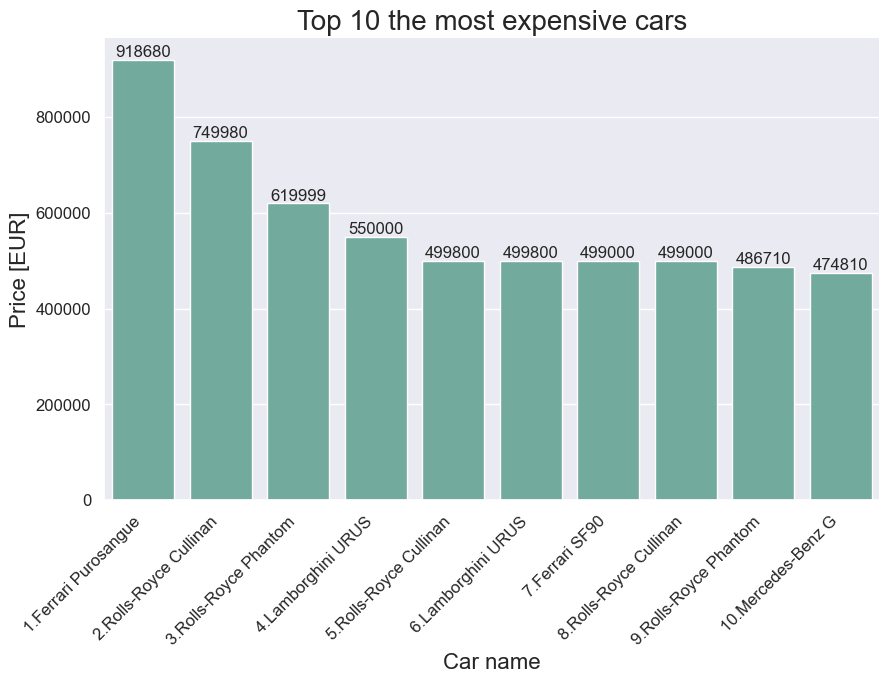

In [99]:
# 2.1.1. Plot 10 most expensive cars
top_10_cars = df.sort_values(by="price", ascending=False).head(10)
top_10_names = []
for index in range(10):
    top_10_names.append(f"{index+1}.{top_10_cars['manufacturer'].iloc[index]} {top_10_cars['model'].iloc[index]}")
top_10_cars["names"] = top_10_names

plot_barchar_data(top_10_cars, "names", "price", 'Top 10 the most expensive cars', 'Car name', 'Price [EUR]')

In [100]:
# 2.2. Which is the cheapest car?
cheap_car = df.loc[df['price'] == df['price'].min()]
print(f"The cheapest car in current analyze is {cheap_car.iloc[0,0]} {cheap_car.iloc[0,1]} that costs {cheap_car.iloc[0,7]} {cheap_car.iloc[0,8]}.")

The cheapest car in current analyze is Volkswagen Golf that costs 300 EUR.


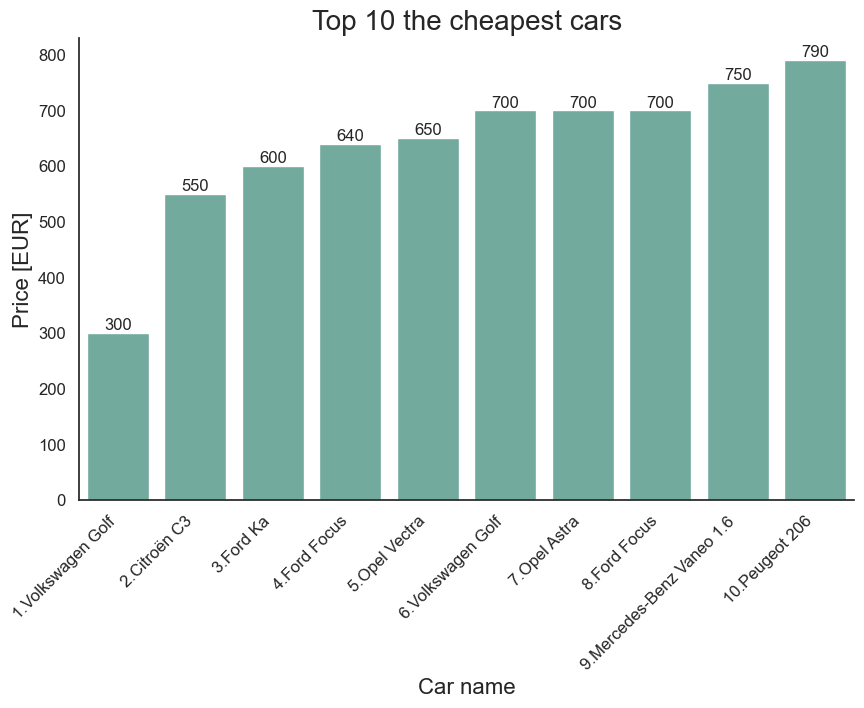

In [101]:
# 2.2.1. Plot 10 cheapest cars
bottom_10_cars = df.sort_values(by="price", ascending=True).head(10)
bottom_10_names = []
for index in range(10):
    bottom_10_names.append(f"{index+1}.{bottom_10_cars['manufacturer'].iloc[index]} {bottom_10_cars['model'].iloc[index]}")
bottom_10_cars["names"] = bottom_10_names

plot_barchar_data(bottom_10_cars, "names", "price", 'Top 10 the cheapest cars', 'Car name', 'Price [EUR]')


In [102]:
# 3.1. Which manufacturer has more cars?
more_manufact_no_cars = df['manufacturer'].value_counts().iloc[0]
more_manufact_name = df['manufacturer'].mode().iloc[0]
print(f"Manufacturer with most cars is {more_manufact_name} with {more_manufact_no_cars} cars.")

Manufacturer with most cars is Mercedes-Benz with 4857 cars.


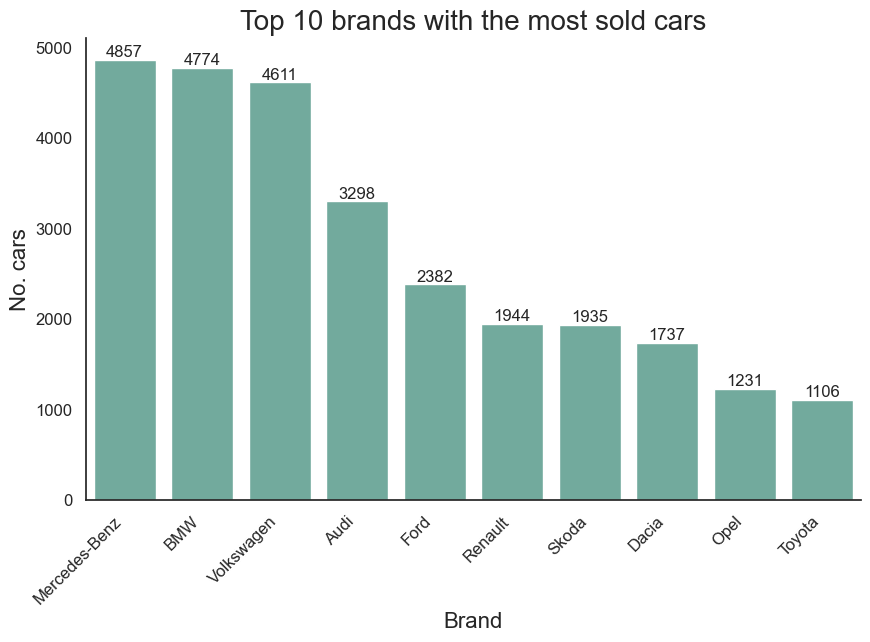

In [103]:
# 3.1.1. Plot 10 manufacturer with the most cars
count_10_manufact = pd.DataFrame()
count_10_manufact["count"] = df["manufacturer"].value_counts().sort_values(ascending=False).head(10)
count_10_manufact["names"] = count_10_manufact.index[:].to_list()

plot_barchar_data(count_10_manufact, "names", "count", 'Top 10 brands with the most sold cars', 'Brand', 'No. cars')

In [104]:
# 3.2. Which model has more cars?
more_model_no_cars = df['model'].value_counts().iloc[0]
more_model_name = df['model'].mode().iloc[0]
print(f"The most cars are of model {more_model_name} with {more_model_no_cars} cars.")

The most cars are of model Passat with 1144 cars.


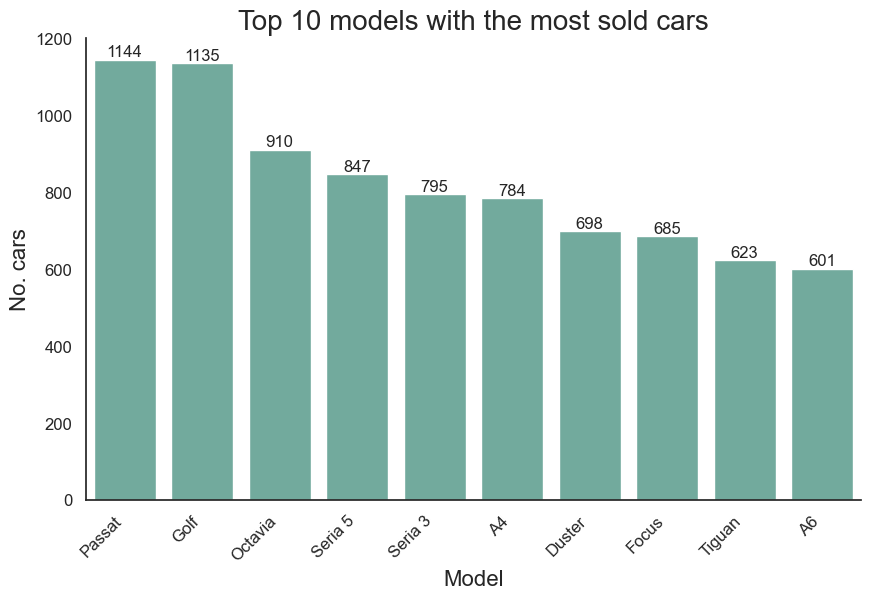

In [105]:
# 3.2.1. Plot 10 model with the most cars
count_10_model = pd.DataFrame()
count_10_model["count"] = df["model"].value_counts().sort_values(ascending=False).head(10)
count_10_model["names"] = count_10_model.index[:].to_list()

plot_barchar_data(count_10_model, "names", "count", 'Top 10 models with the most sold cars', 'Model', 'No. cars')

In [106]:
# 3.3. Which manufacturer has less cars?
manufact_no_cars = df['manufacturer'].value_counts().min()
manufact_name = df['manufacturer'].value_counts().idxmin()
print(f"Manufacturer with the fewest cars is {manufact_name} with {manufact_no_cars} cars.")

Manufacturer with the fewest cars is Ineos with 1 cars.


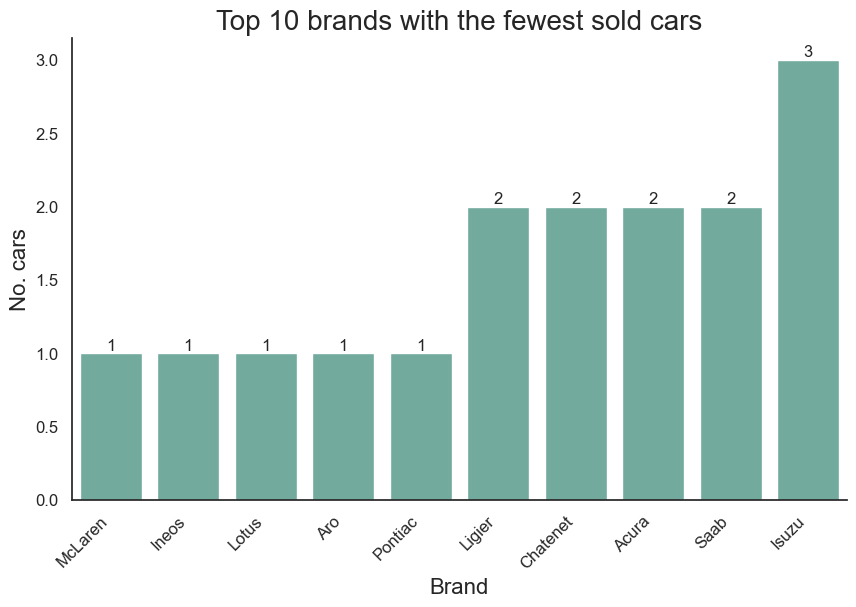

In [107]:
# 3.3.1. Plot 10 manufacturer with fewest cars
count_10_manufact = pd.DataFrame()
count_10_manufact["count"] = df["manufacturer"].value_counts().sort_values(ascending=True).head(10)
count_10_manufact["names"] = count_10_manufact.index[:].to_list()

plot_barchar_data(count_10_manufact, "names", "count", 'Top 10 brands with the fewest sold cars', 'Brand', 'No. cars')

In [108]:
# 3.4. Which model has less cars?
model_no_cars = df['model'].value_counts().min()
model_name = df['model'].value_counts().idxmin()
print(f"Model with fewest cars is {model_name} with {model_no_cars} cars.")

Model with fewest cars is M2 M235i with 1 cars.


In [109]:
# 4.1. Which manufacturer is the most expensive at average?
expensive_avg_price_per_manufact = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
print(f"The most expensive manufacturer at average is {expensive_avg_price_per_manufact.index[0]} with average price of {expensive_avg_price_per_manufact.iloc[0]} EUR/car.")

The most expensive manufacturer at average is Rolls-Royce with average price of 364534.1 EUR/car.


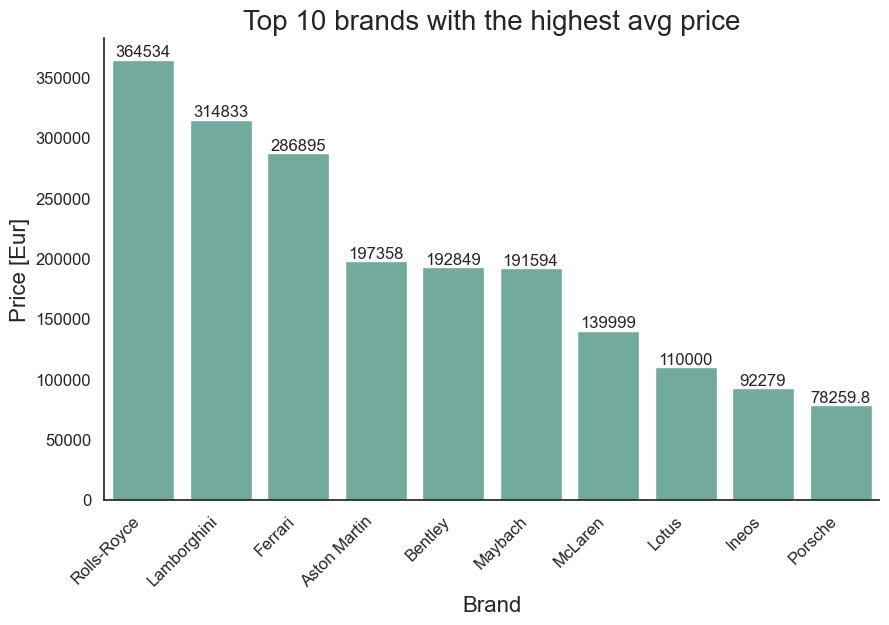

In [110]:
# 4.1.1. Plot 10 the most expensive at average manufacturer
top_avg_price_manufact = pd.DataFrame()
top_avg_price_manufact["price"] = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
top_avg_price_manufact["names"] = top_avg_price_manufact.index[:].to_list()

plot_barchar_data(top_avg_price_manufact, "names", "price", 'Top 10 brands with the highest avg price', 'Brand', 'Price [Eur]')

In [111]:
# 4.2. Which model is the most expensive at average?
expensive_avg_price_per_model = df.groupby('model')['price'].mean().sort_values(ascending=False)
print(f"The most expensive model at average is {expensive_avg_price_per_model.index[0]} with average price of {expensive_avg_price_per_model.iloc[0]} EUR/car.")

The most expensive model at average is Purosangue with average price of 918680.0 EUR/car.


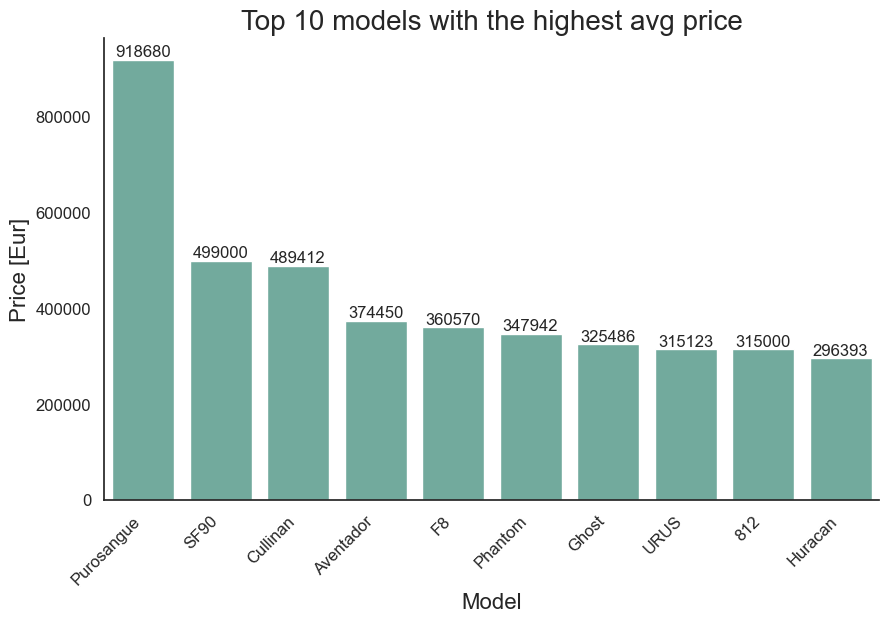

In [112]:
# 4.2.1. Plot 10 the most expensive at average model
top_avg_price_model = pd.DataFrame()
top_avg_price_model["price"] = df.groupby('model')['price'].mean().sort_values(ascending=False).head(10)
top_avg_price_model["names"] = top_avg_price_model.index[:].to_list()

plot_barchar_data(top_avg_price_model, "names", "price", 'Top 10 models with the highest avg price', 'Model', 'Price [Eur]')

In [113]:
# 4.3. Which manufacturer is most cheap at average?
cheap_avg_price_per_manufact = df.groupby('manufacturer')['price'].mean().sort_values(ascending=True)
print(f"The cheapest manfacturer at average is {cheap_avg_price_per_manufact.index[0]} with average price of {cheap_avg_price_per_manufact.iloc[0]} EUR/car.")

The cheapest manfacturer at average is Daewoo with average price of 1229.6 EUR/car.


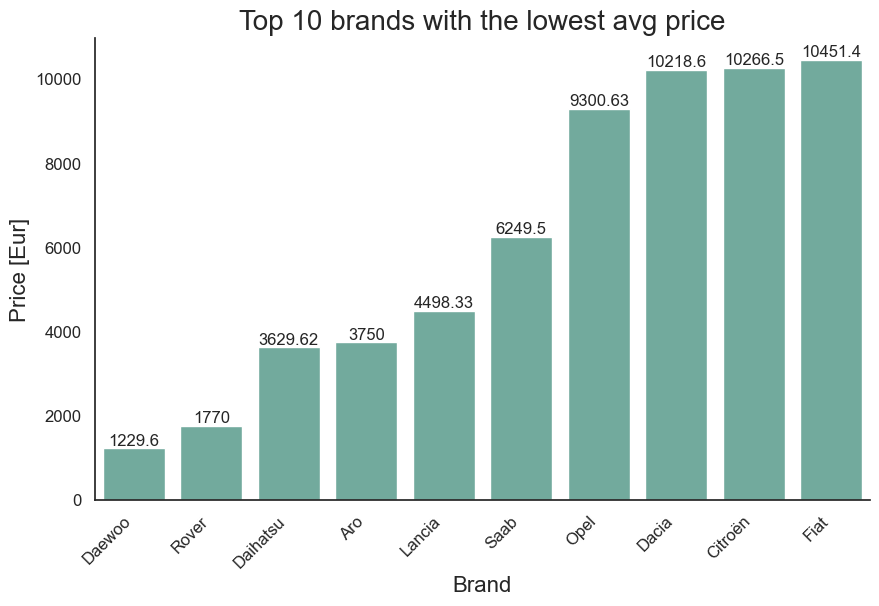

In [114]:
# 4.3.1. Plot 10 the cheapest at average manufacturer
bottom_avg_price_manufact = pd.DataFrame()
bottom_avg_price_manufact["price"] = df.groupby('manufacturer')['price'].mean().sort_values(ascending=True).head(10)
bottom_avg_price_manufact["names"] = bottom_avg_price_manufact.index[:].to_list()

plot_barchar_data(bottom_avg_price_manufact, "names", "price", 'Top 10 brands with the lowest avg price', 'Brand', 'Price [Eur]')

In [115]:
# 4.4. Which model is most cheap at average?
cheap_avg_price_per_model = df.groupby('model')['price'].mean().sort_values(ascending=True)
print(f"The cheapest model at average is {cheap_avg_price_per_model.index[0]} with average price of {cheap_avg_price_per_model.iloc[0]} EUR/car.")

The cheapest model at average is Vaneo 1.6 with average price of 750.0 EUR/car.


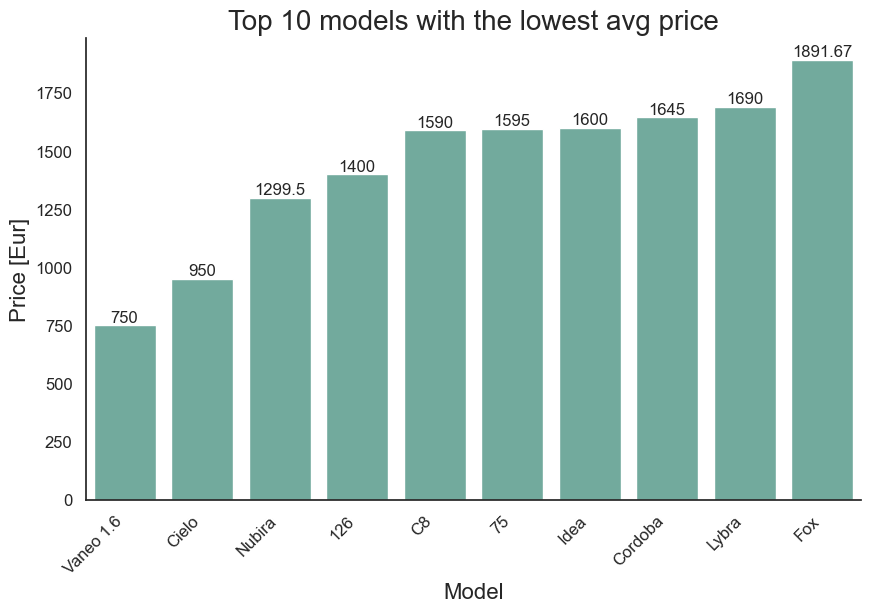

In [116]:
# 4.4.1. Plot 10 the cheapest at average model
bottom_avg_price_model = pd.DataFrame()
bottom_avg_price_model["price"] = df.groupby('model')['price'].mean().sort_values(ascending=True).head(10)
bottom_avg_price_model["names"] = bottom_avg_price_model.index[:].to_list()

plot_barchar_data(bottom_avg_price_model, "names", "price", 'Top 10 models with the lowest avg price', 'Model', 'Price [Eur]')

In [117]:
# 5.1. In which county are selling most cars?
county_max_cars = df['county'].value_counts()
print(f"The most cars are in {county_max_cars.idxmax()} county with {county_max_cars.max()} cars.")

The most cars are in Bucuresti county with 12848 cars.


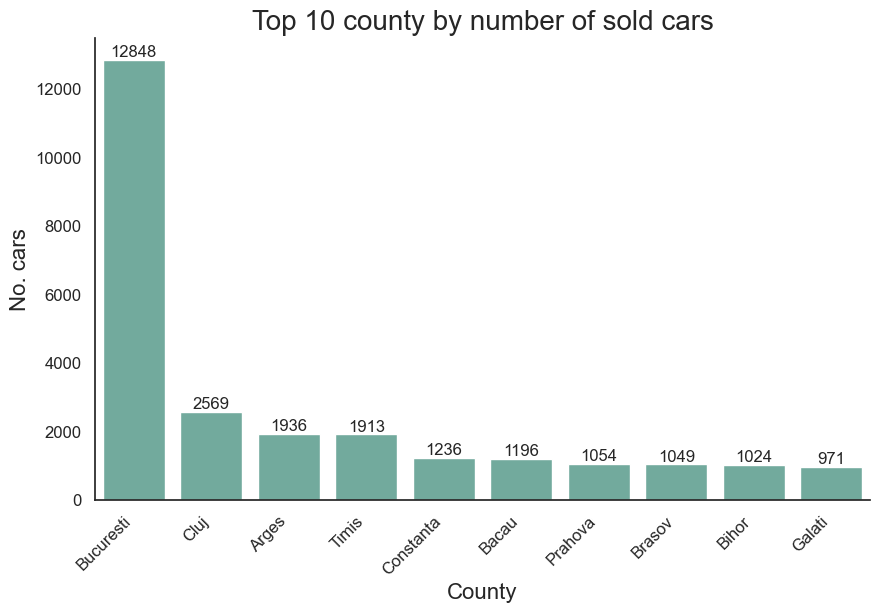

In [118]:
# 5.1.1. Plot 10 county with the most sold cars
county_max_cars = pd.DataFrame()
county_max_cars["count"] = df.value_counts("county").sort_values(ascending=False).head(10)
county_max_cars["names"] = county_max_cars.index[:].to_list()

plot_barchar_data(county_max_cars, "names", "count", 'Top 10 county by number of sold cars', 'County', 'No. cars')

In [119]:
# 5.2. In which city are selling most cars?
city_max_cars = df['city'].value_counts()
print(f"The most cars are in {city_max_cars.idxmax()} city with {city_max_cars.max()} cars.")

The most cars are in Bucuresti city with 8696 cars.


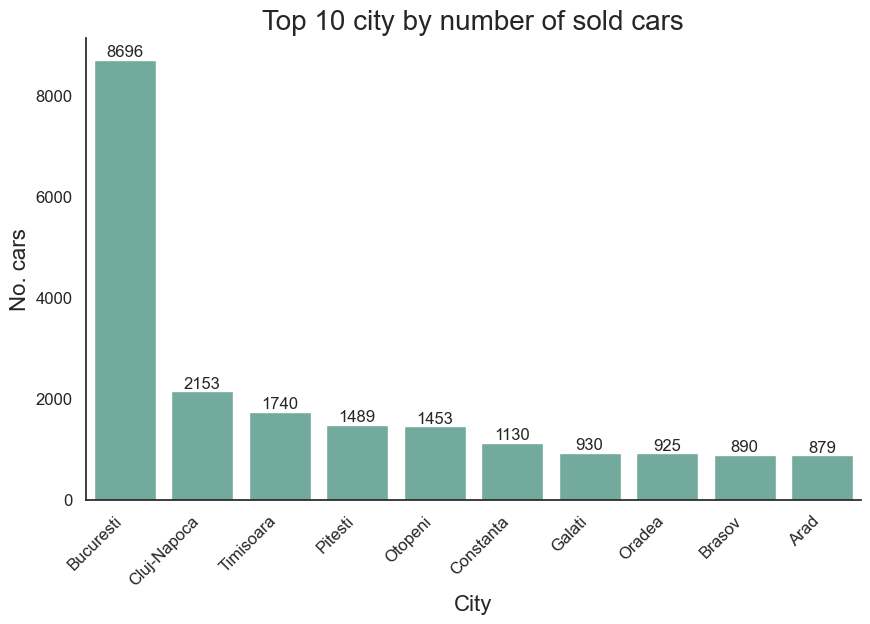

In [120]:
# 5.2.1. Plot 10 city with the most sold cars
city_max_cars = pd.DataFrame()
city_max_cars["count"] = df.value_counts("city").sort_values(ascending=False).head(10)
city_max_cars["names"] = city_max_cars.index[:].to_list()

plot_barchar_data(city_max_cars, "names", "count", 'Top 10 city by number of sold cars', 'City', 'No. cars')

In [121]:
# 6.1. Which type of fuel is the most selling?
fuel_max_count = df['fuel'].value_counts()
print(f"The most cars with total number of {fuel_max_count.max()} cars are used {fuel_max_count.idxmax()} fuel.")

The most cars with total number of 22736 cars are used Diesel fuel.


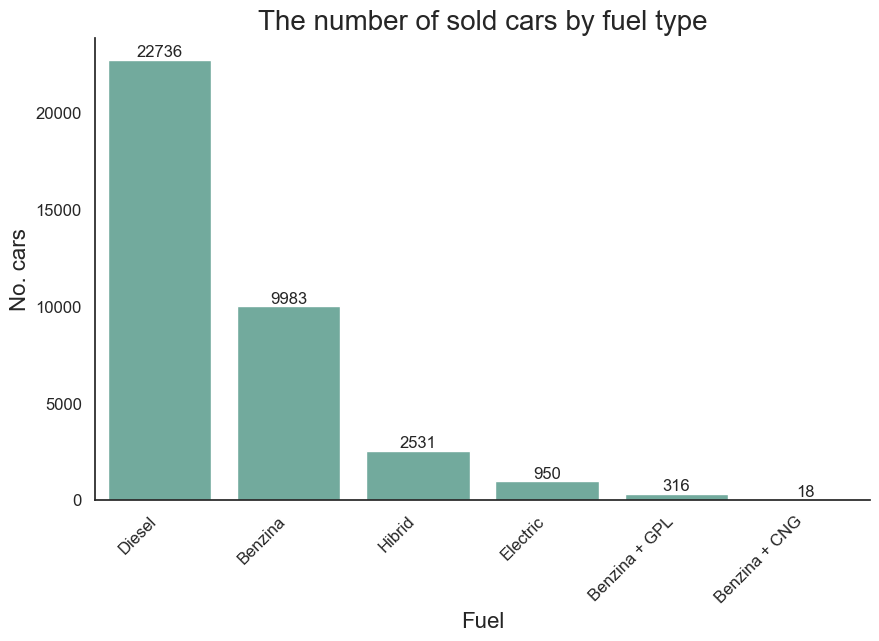

In [122]:
# 6.1.1. Plot the sold cars by fuel type
fuel_count = pd.DataFrame()
fuel_count["count"] = df.value_counts("fuel").sort_values(ascending=False).head(10)
fuel_count["names"] = fuel_count.index[:].to_list()

plot_barchar_data(fuel_count, "names", "count", 'The number of sold cars by fuel type', 'Fuel', 'No. cars')

In [123]:
# 6.2. Which type of fuel is the less selling?
fuel_min_count = df['fuel'].value_counts()
print(f"The fewest cars with total number of {fuel_min_count.min()} cars are used {fuel_min_count.idxmin()} fuel.")

The fewest cars with total number of 18 cars are used Benzina + CNG fuel.


In [124]:
# 7.1. Which is the biggest engine capacity?
max_capacity = df[df['capacity'] == df['capacity'].max()]
print(f"The max engine capacity of {max_capacity['capacity'].iloc[0]} cm3 has {max_capacity['manufacturer'].iloc[0]} {max_capacity['model'].iloc[0]}.")

The max engine capacity of 8200 cm3 has Cadillac Eldorado.


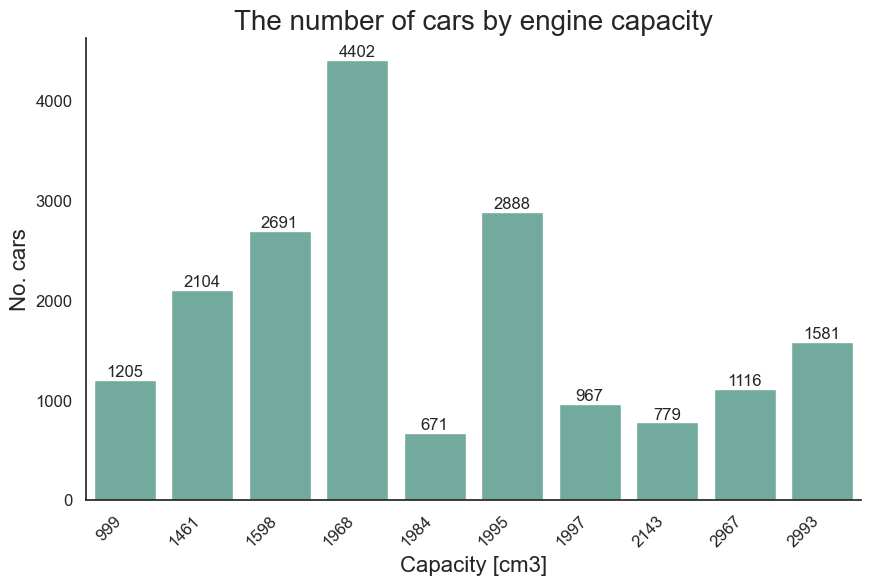

In [125]:
# 7.1.1. Plot the sold cars by engine capacity
capacity_count = pd.DataFrame()
capacity_count["count"] = df[df['capacity'] != 0]['capacity'].value_counts().sort_values(ascending=False).head(10)
capacity_count["capacity"] = capacity_count.index[:].to_list()

plot_barchar_data(capacity_count, "capacity", "count", 'The number of cars by engine capacity', 'Capacity [cm3]', 'No. cars')

In [126]:
# 7.2. Which is the smallest engine capacity?
df_non_0 = df.drop(df[df.capacity == 0].index)
min_capacity = df_non_0[df_non_0['capacity'] == df_non_0['capacity'].min()]
print(f"The min engine capacity of {min_capacity['capacity'].iloc[0]} cm3 has {min_capacity['manufacturer'].iloc[0]} {min_capacity['model'].iloc[0]}.")

The min engine capacity of 400 cm3 has Opel Vectra.


In [127]:
# 8.1. Which is the biggest milleage?
max_mileage = df[df['mileage'] == df['mileage'].max()]
print(f"The max mileage of {max_mileage['mileage'].iloc[0]} KM has {max_mileage['manufacturer'].iloc[0]} {max_mileage['model'].iloc[0]}.")

The max mileage of 2800000 KM has BMW X5 xDrive30d.


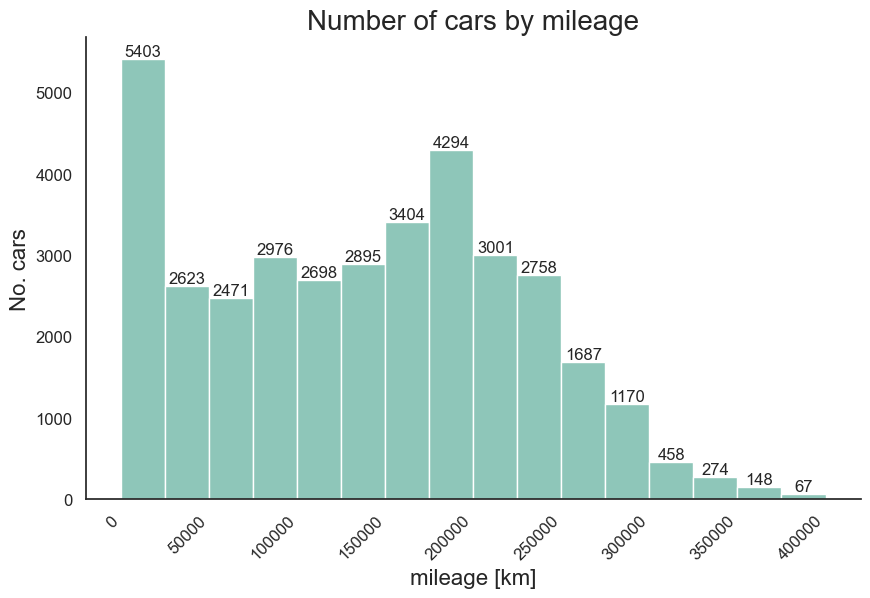

In [128]:
# 8.1.1. Plot mileage
mileage_plot = df.drop(df[(df.mileage > 400000) | (df.mileage == 0)].index)

plot_histogram_data(mileage_plot, "mileage", 25000, "Number of cars by mileage", "mileage [km]", "No. cars")

In [129]:
# 8.2. Which is the smallest milleage?
df.drop(df[df.mileage == 0].index)
min_mileage = df[df['mileage'] == df['mileage'].min()]
print(f"The min mileage of {min_mileage['mileage'].iloc[0]} KM has {min_mileage['manufacturer'].iloc[0]} {min_mileage['model'].iloc[0]}.")

The min mileage of 0 KM has Aixam Crossover.


In [130]:
# 9.1. Which is the biggest power?
max_power = df[df['power'] == df['power'].max()]
print(f"The max power of {max_power['power'].iloc[0]} HP has {max_power['manufacturer'].iloc[0]} {max_power['model'].iloc[0]}.")

The max power of 1020 HP has Tesla Model S.


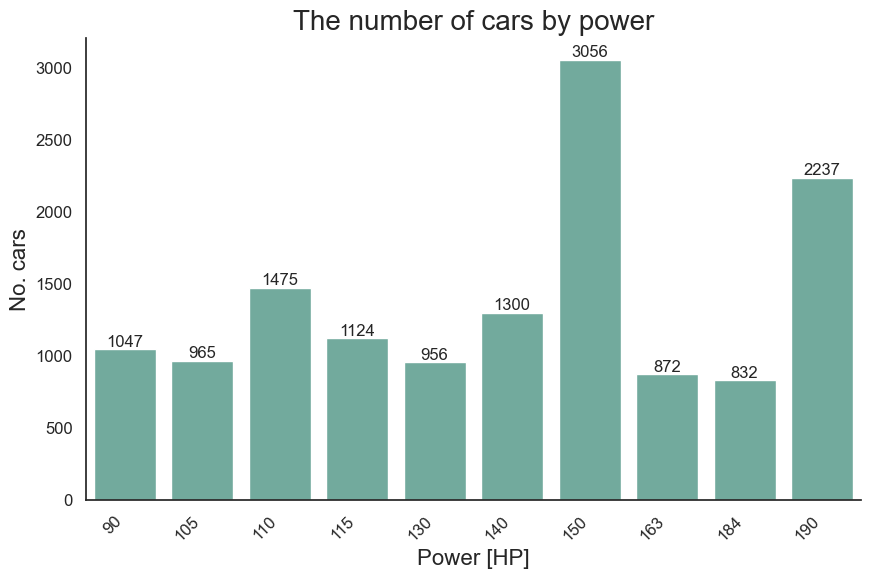

In [131]:
# 9.1.1. Plot the sold cars by power
power_count = pd.DataFrame()
power_count["count"] = df[df['power'] != 0]['power'].value_counts().sort_values(ascending=False).head(10)
power_count["power"] = power_count.index[:].to_list()

plot_barchar_data(power_count, "power", "count", 'The number of cars by power', 'Power [HP]', 'No. cars')

In [132]:
# 9.2. Which is the smallest power?
df_non_0 = df.drop(df[df.power == 0].index)
min_power = df_non_0[df_non_0['power'] == df_non_0['power'].min()]
print(f"The min power of {min_power['power'].iloc[0]} HP has {min_power['manufacturer'].iloc[0]} {min_power['model'].iloc[0]}.")

The min power of 5 HP has Aixam Coupe.


In [133]:
# 10. How many cars are manufactured in current year?
current_year = datetime.now().year
current_year_no_cars = df[df['year'] == 2023].shape[0]
print(f"Number of cars that were manufactured in 2023 is {current_year_no_cars}.")

Number of cars that were manufactured in 2023 is 2782.


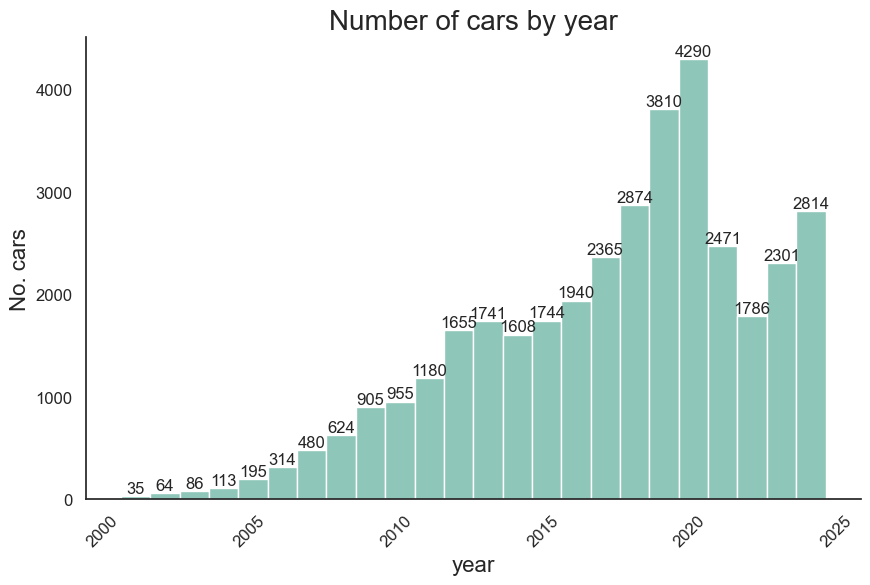

In [134]:
# 10.1. Plot year
year_plot = df.drop(df[(df.year < 2000) | (df.year == 0)].index)

plot_histogram_data(year_plot, "year", 1, "Number of cars by year", "year", "No. cars")

In [135]:
# 11.1. How the feature influence each other?
label_encoder = LabelEncoder()
encoded_columns = ['manufacturer', 'model', 'fuel', 'currency', 'city', 'county', 'status']
for column in encoded_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.corr()

,manufacturer,model,mileage,capacity,power,year,fuel,price,currency,city,county,status
manufacturer,1.000000,-0.035953,0.024306,-0.186981,-0.191634,-0.031751,0.008774,-0.072398,-0.001756,0.015943,0.037775,-0.001502
model,-0.035953,1.000000,0.031618,0.133371,0.122946,0.014274,0.092352,0.047337,-0.005572,-0.001486,-0.003125,-0.007839
mileage,0.024306,0.031618,1.000000,0.029084,-0.247337,-0.610215,0.140588,-0.433662,0.008115,0.047783,0.060503,-0.140119
capacity,-0.186981,0.133371,0.029084,1.000000,0.671435,-0.039491,0.018148,0.476254,-0.009687,-0.028584,-0.021368,0.004872
power,-0.191634,0.122946,-0.247337,0.671435,1.000000,0.282390,-0.059215,0.761707,-0.018627,-0.043099,-0.048103,0.077647
year,-0.031751,0.014274,-0.610215,-0.039491,0.282390,1.000000,0.050311,0.459907,-0.031137,-0.035758,-0.078890,0.159347
fuel,0.008774,0.092352,0.140588,0.018148,-0.059215,0.050311,1.000000,-0.050862,-0.001583,0.011417,0.008814,0.000187
price,-0.072398,0.047337,-0.433662,0.476254,0.761707,0.459907,-0.050862,1.000000,0.008865,-0.040836,-0.058047,0.131443
currency,-0.001756,-0.005572,0.008115,-0.009687,-0.018627,-0.031137,-0.001583,0.008865,1.000000,-0.002900,0.001388,-0.008435
city,0.015943,-0.001486,0.047783,-0.028584,-0.043099,-0.035758,0.011417,-0.040836,-0.002900,1.000000,0.482717,-0.018118


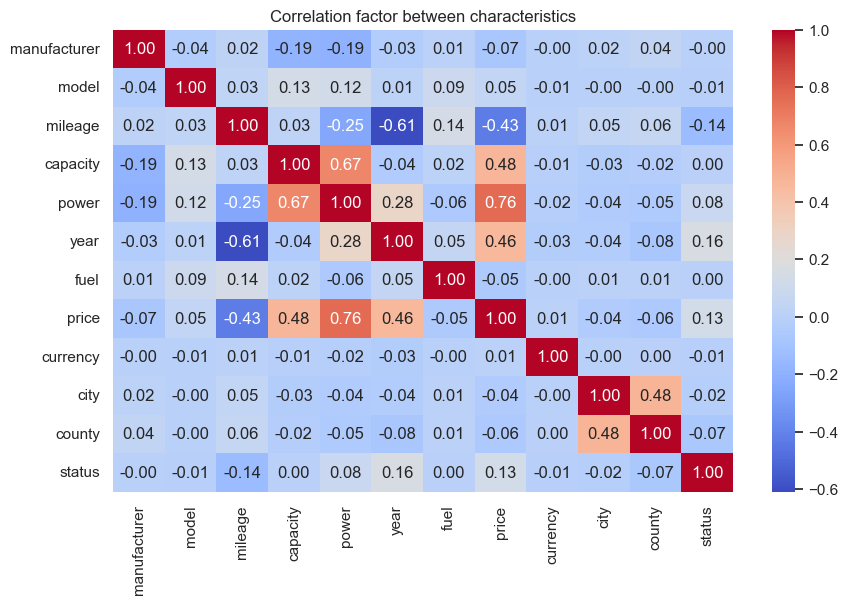

In [136]:
# 11.1.1. Plot Heatmap of the features
label_encoder = LabelEncoder()
encoded_columns = ['manufacturer', 'model', 'fuel', 'currency', 'city', 'county', 'status']
for column in encoded_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation factor between characteristics")
plt.show()

In [137]:
# 11.2. How the feature influence each other?
important_columns = df.drop(['manufacturer', 'model', 'status', 'city', 'county', 'currency', 'fuel'], axis=1).corr()
important_columns

,mileage,capacity,power,year,price
mileage,1.000000,0.029084,-0.247337,-0.610215,-0.433662
capacity,0.029084,1.000000,0.671435,-0.039491,0.476254
power,-0.247337,0.671435,1.000000,0.282390,0.761707
year,-0.610215,-0.039491,0.282390,1.000000,0.459907
price,-0.433662,0.476254,0.761707,0.459907,1.000000


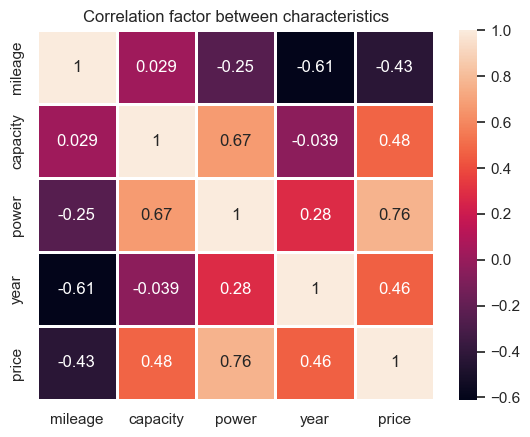

In [138]:
# 11.2.1. Plot Heatmap of the features
important_columns = df.drop(['manufacturer', 'model', 'status', 'city', 'county', 'currency', 'fuel'], axis=1).corr()

sns.set(style="whitegrid")
ax=sns.heatmap(important_columns, 
            linewidth=2,
            annot=True)
ax.set_title("Correlation factor between characteristics")
plt.show()

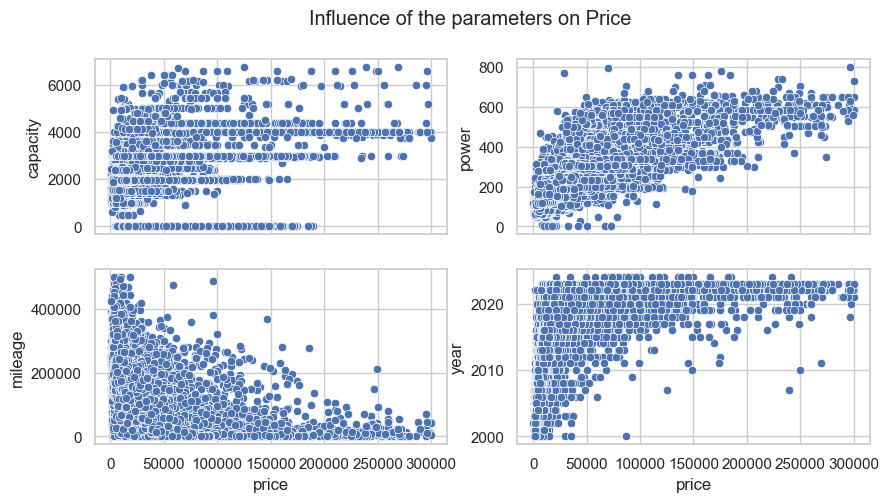

In [139]:
# 11.2.2. Plot correlation of the features
correlation_df = df.drop(df[(df.price > 300000) | (df.price == 0) | (df.mileage > 500000) | (df.power > 800) | (df.year < 2000)].index)

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
fig.suptitle('Influence of the parameters on Price')

sns.scatterplot(data=correlation_df, x='price', y='capacity', ax=axes[0,0])
sns.scatterplot(data=correlation_df, x='price', y='power', ax=axes[0,1])
sns.scatterplot(data=correlation_df, x='price', y='mileage', ax=axes[1,0])
sns.scatterplot(data=correlation_df, x='price', y='year', ax=axes[1,1])
plt.show()